1. 기술통계 기초 실습
데이터 평균, 중앙값, 최빈값 계산

분산, 표준편차, 사분위수 계산

데이터 분포 히스토그램, 박스플롯 시각화

예) 학생 성적 데이터 평균과 분포 시각화

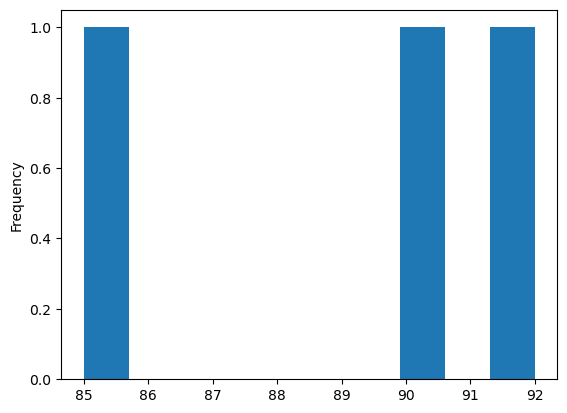

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'학생': ['A', 'B', 'C'], '수학': [90, 85, 92], '영어': [88, 82, 95]}
df = pd.DataFrame(data)
df['평균'] = df[['수학', '영어']].mean(axis=1)
df['수학'].plot(kind='hist')
plt.show()

2. 확률분포와 난수 생성
정규분포, 이항분포 이해와 시각화

난수 생성 및 샘플링 실습

예) 정규분포 곡선과 히스토그램 그리기

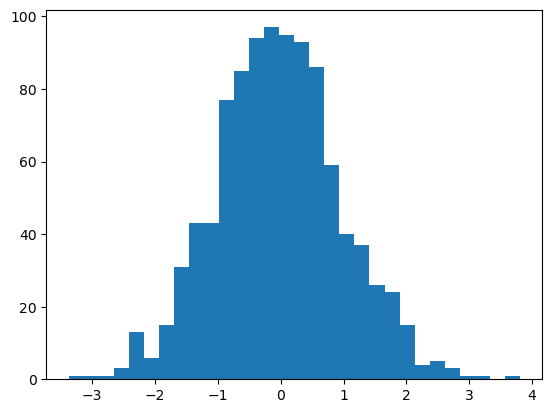

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.normal(loc=0, scale=1, size=1000)
plt.hist(x, bins=30)
plt.show()

3. 가설 검정 실습
단일 표본 t-검정, 독립 표본 t-검정 수행

p-value 계산과 해석 방법

예) 치료 전후 그룹 평균 비교

In [5]:
from scipy import stats

group1 = [20, 22, 21, 30, 25]
group2 = [28, 25, 27, 35, 29]
t_stat, p_val = stats.ttest_ind(group1, group2)
print("T-통계량:", t_stat, "p-value:", p_val)

T-통계량: -2.105418458465181 p-value: 0.06835886943671121


4. 상관관계 및 회귀분석
피어슨 상관계수 계산 및 해석

단순 선형 회귀모델 생성과 시각화

예) 친구 수와 SNS 사용 시간의 관계 분석

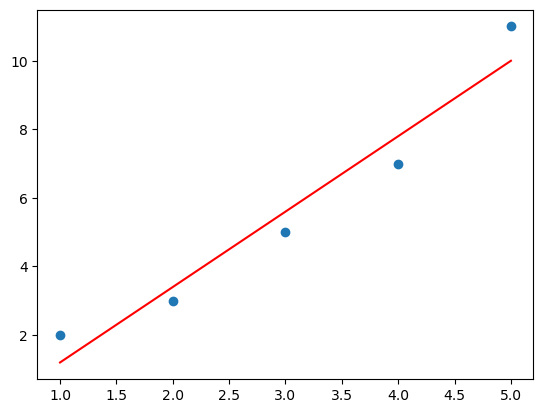

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 3, 5, 7, 11])
model = LinearRegression().fit(x, y)
plt.scatter(x, y)
plt.plot(x, model.predict(x), color='red')
plt.show()

5. 데이터 전처리 기본
결측치 처리, 이상치 탐색

데이터 그룹핑, 요약 통계 생성

예) 결측치 개수 확인, 그룹별 평균 계산

In [9]:
df.isnull().sum()
df.groupby('그룹')['점수'].mean()

KeyError: '그룹'